venv/Scripts/deactivate to turn the virtual environment off

In [6]:
import numpy as np
import pandas as pd

import sklearn
from sklearn import linear_model
from sklearn.utils import shuffle



Importing in the dataset

In [10]:
data = pd.read_csv('C:\\Users\\iturner1\\Documents\\Personal Coding\\Machine Learning\\student_mat_2173a47420.csv', sep = ';')
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


Isolating part of the dataset

In [13]:
data = data[['G1', 'G2', 'G3', 'studytime', 'failures', 'absences']]
data.head()

,G1,G2,G3,studytime,failures,absences
0,5,6,6,2,0,6
1,5,5,6,2,0,4
2,7,8,10,2,3,10
3,15,14,15,3,0,2
4,6,10,10,2,0,4


In [40]:
# Attribute we are trying to predict, also known as a LABEL
predict = 'G3'

# Isolating the data we are trying to predict
x = np.array(data.drop(labels = predict, axis = 1)) #Features, attributes of the labels
y = np.array(data[predict]) #Labels, what we are trying to predict

# Splitting the data into training sets and testing sets. Especially splitting the predicting 
# label into a training set and a testing set so the data isn't trained using the same data it is
# being tested with. 
xTrain, xTest, yTrain, yTest = sklearn.model_selection.train_test_split(x, y, test_size= 0.1)



In [41]:
# Creating the linear model object
linear = linear_model.LinearRegression()

# Creating a line of best fit based on the training data (90% of the data)
linear.fit(xTrain, yTrain)

# Testing the model out to see how accurate it is. Finally using the test data to check how accurate/close 
# the expected score is to the actual score. The x test is the raw data it is being used to predict
acc = linear.score(xTest, yTest)

# Printing the accuracy of it
print(acc)


0.8554708555767634


Viewing the constraints (slopes and y-intercept of the model)

In [44]:
print(linear.intercept_)
print(linear.coef_)

-1.3708743163907045
[ 0.14893482  0.97769105 -0.21009203 -0.26342598  0.03964469]


Seeing how each student individually performs and the test set that went along with it

In [46]:
predictions = linear.predict(xTest)

for x in range(len(predictions)):
    print(predictions[x], xTest[x], yTest[x],'Count:', x)

7.073013752194246 [7 8 2 0 0] 0 Count: 0
14.097257486767498 [16 14  4  0  6] 15 Count: 1
12.636497644522503 [11 13  2  0  2] 14 Count: 2
12.934367288626058 [13 13  2  0  2] 13 Count: 3
12.880372615657766 [13 12  1  0 20] 12 Count: 4
16.383890344701996 [17 16  2  0  0] 16 Count: 5
8.586442557678788 [9 9 2 0 6] 10 Count: 6
15.266908397354523 [15 15  2  0  4] 15 Count: 7
7.548749981958727 [ 7  8  2  0 12] 8 Count: 8
7.916265076486646 [10  8  2  0 10] 8 Count: 9
7.198211374615624 [ 8  8  4  0 10] 8 Count: 10
16.454691472737 [15 16  1  0  4] 15 Count: 11
19.913858450015983 [18 19  1  0  6] 19 Count: 12
8.050704798692992 [7 9 2 0 0] 8 Count: 13
4.800871737631921 [7 6 1 2 0] 0 Count: 14
16.32273313787004 [18 16  3  0  0] 16 Count: 15
13.893926170329346 [12 14  1  0  0] 15 Count: 16
11.597649391191801 [12 12  3  0  2] 11 Count: 17
9.274752203666388 [ 9 10  3  0  4] 10 Count: 18
10.568676848364126 [ 9  9  2  0 56] 8 Count: 19
9.834227162282582 [11 10  1  0  0] 10 Count: 20
9.43084955958183 [ 9 

In [53]:
import pickle
import matplotlib.pyplot as plt
from matplotlib import style


Creating multiple models and selecting the best performing one

In [54]:
count = 0
highScore = 0
while count <= 300:
    # Attribute we are trying to predict, also known as a LABEL
    predict = 'G3'

    # Isolating the data we are trying to predict
    x = np.array(data.drop(labels = predict, axis = 1)) #Features, attributes of the labels
    y = np.array(data[predict]) #Labels, what we are trying to predict
    
    # Splitting the data into training sets and testing sets. Especially splitting the predicting 
    # label into a training set and a testing set so the data isn't trained using the same data it is
    # being tested with. 
    xTrain, xTest, yTrain, yTest = sklearn.model_selection.train_test_split(x, y, test_size= 0.1)

    # Creating the linear model object
    linear = linear_model.LinearRegression()

    # Creating a line of best fit based on the training data (90% of the data)
    linear.fit(xTrain, yTrain)

    # Testing the model out to see how accurate it is. Finally using the test data to check how accurate/close 
    # the expected score is to the actual score. The x test is the raw data it is being used to predict
    acc = linear.score(xTest, yTest)

    # Checking to see if the model's accuracy score was the highest
    if acc > highScore:
        # Assigning the high score variable
        highScore = acc

        # Saving the model through pickle so that the linear model can be used again later
        with open('studentGrades.pickle', 'wb') as f:
            pickle.dump(linear, f)
        

    # Printing the accuracy of it
    print(acc, highScore)

    

    count+=1

    

0.842870506794776 0.842870506794776
0.8420256781333149 0.842870506794776
0.7879545245665397 0.842870506794776
0.8724426156608426 0.8724426156608426
0.867394978230398 0.8724426156608426
0.8218377225381874 0.8724426156608426
0.9447163151348177 0.9447163151348177
0.7953124382549188 0.9447163151348177
0.9130986109906967 0.9447163151348177
0.8646193018813266 0.9447163151348177
0.9423879631514005 0.9447163151348177
0.7593198574511562 0.9447163151348177
0.9504744780538401 0.9504744780538401
0.8620104708265974 0.9504744780538401
0.9125114943291356 0.9504744780538401
0.800627528017052 0.9504744780538401
0.8206204499519795 0.9504744780538401
0.8678383919051177 0.9504744780538401
0.8497598862010344 0.9504744780538401
0.7804778476050047 0.9504744780538401
0.9002647507149114 0.9504744780538401
0.8218464345150611 0.9504744780538401
0.8267315611487689 0.9504744780538401
0.8227873281487046 0.9504744780538401
0.7321903533446793 0.9504744780538401
0.7561962313305205 0.9504744780538401
0.7962432254977396

Loading in a specific model that had the highest accuracy

In [64]:
# Loading in the pickle object
pickleIn = open('studentGrades.pickle', 'rb')
linear2 = pickle.load(pickleIn)
print('Coefficient:', linear2.coef_)
print('Y-Intercept:', linear2.intercept_)

# Printing the model's performance wgen predicting the final score
predicted = linear2.predict(xTest)
print(data.drop(labels = predict, axis = 1).columns,'\n')
for x in range(len(predicted)):
    print(predicted[x], xTest[x], yTest[x])

Coefficient: [ 0.16801175  0.98083809 -0.2195291  -0.26729296  0.03898229]
Y-Intercept: -1.635818464653486
Index(['G1', 'G2', 'studytime', 'failures', 'absences'], dtype='object') 

10.226448118925347 [ 9 11  2  0  0] 12
12.938135902269858 [13 13  2  0  2] 13
7.115922093861309 [8 8 2 0 0] 9
6.935477835661354 [9 8 1 3 6] 10
4.602665528166691 [ 6  5  1  0 14] 5
18.850396876290848 [19 18  2  0  2] 18
8.796159386961934 [9 9 1 0 8] 10
18.126832518421136 [16 18  3  0  2] 18
14.87336483875298 [12 15  1  0  0] 15
10.447780401474795 [ 9  9  2  0 56] 8
6.986542707282217 [10  8  1  3  3] 7
13.756764076093011 [13 13  2  0 23] 13
11.258803552902144 [ 8 12  1  0  0] 12
6.135084003371829 [8 7 2 0 0] 8
15.754687989959823 [16 15  2  0 11] 15
9.14632882442215 [10 10  2  1  0] 0
17.96234051251754 [17 17  2  0 13] 17
11.84218054717646 [14 12  4  0  6] 13
14.602318398182746 [13 15  3  0  0] 15
19.255036954939648 [17 18  2  0 21] 18
11.789286058184778 [12 12  2  0  2] 11
9.4530565478895 [ 8 10  1  0  4] 10


Text(0, 0.5, 'Final Grade')

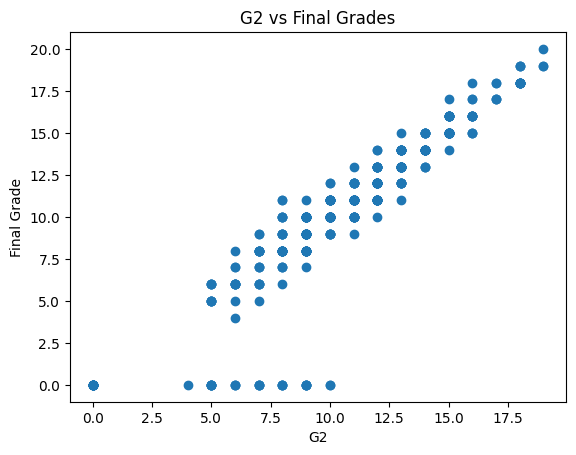

In [77]:
plotData = 'G2'
fig, ax = plt.subplots(nrows= 1, ncols=1)
ax.scatter(data[plotData], data['G3'])
ax.set_title(f'{plotData.capitalize()} vs Final Grades')
ax.set_xlabel(plotData.capitalize())
ax.set_ylabel('Final Grade')

Model Evaluation with the mean squared error and r-squared

In [84]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

mse = mean_squared_error(yTest, predicted)
r2 = r2_score(yTest, predicted)
print('MSE:', mse)
print('RMSE:', np.sqrt(mse))
print('Mean Absolute Error:', mean_absolute_error(yTest, predicted))
print('R-squared:', r2)

MSE: 4.433643176684062
RMSE: 2.105621802861108
Mean Absolute Error: 1.3842589413982629
R-squared: 0.814083523359511


Visualizing Performance

Text(0, 0.5, 'Predicted Values')

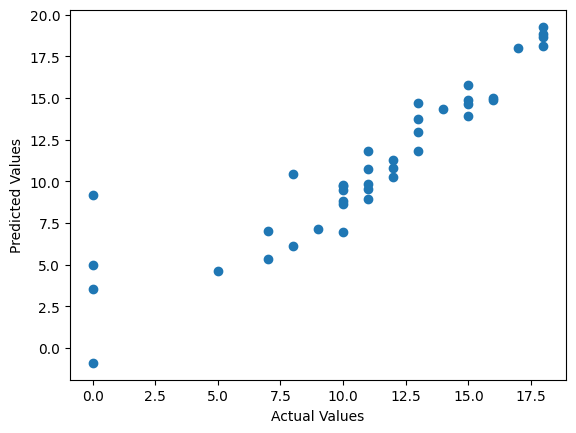

In [80]:
fig2, ax2 = plt.subplots(nrows= 1, ncols= 1)
ax2.scatter(yTest, predicted)
ax2.set_xlabel('Actual Values')
ax2.set_ylabel('Predicted Values')